In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv("/home/negi/M_L/m.r_negi_ML_self/SVM/bill_authentication.csv")
print(dataset)

      Variance  Skewness   Curtosis   Entropy  Class
0     3.621600   8.66610  -2.807300 -0.446990      0
1     4.545900   8.16740  -2.458600 -1.462100      0
2     3.866000  -2.63830   1.924200  0.106450      0
3     3.456600   9.52280  -4.011200 -3.594400      0
4     0.329240  -4.45520   4.571800 -0.988800      0
5     4.368400   9.67180  -3.960600 -3.162500      0
6     3.591200   3.01290   0.728880  0.564210      0
7     2.092200  -6.81000   8.463600 -0.602160      0
8     3.203200   5.75880  -0.753450 -0.612510      0
9     1.535600   9.17720  -2.271800 -0.735350      0
10    1.224700   8.77790  -2.213500 -0.806470      0
11    3.989900  -2.70660   2.394600  0.862910      0
12    1.899300   7.66250   0.153940 -3.110800      0
13   -1.576800  10.84300   2.546200 -2.936200      0
14    3.404000   8.72610  -2.991500 -0.572420      0
15    4.676500  -3.38950   3.489600  1.477100      0
16    2.671900   3.06460   0.371580  0.586190      0
17    0.803550   2.84730   4.343900  0.601700 

In [4]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
dataset.shape

(1372, 5)

In [6]:
dataset.size

6860

In [7]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
dataset.groupby('Class').mean()

,Variance,Skewness,Curtosis,Entropy
Class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


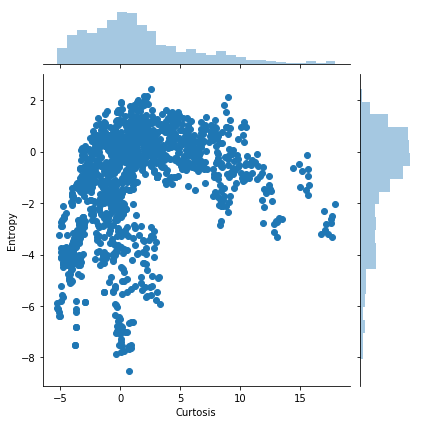

In [13]:
sns.jointplot(x='Curtosis',y='Skewness',data=dataset,kind='scatter')

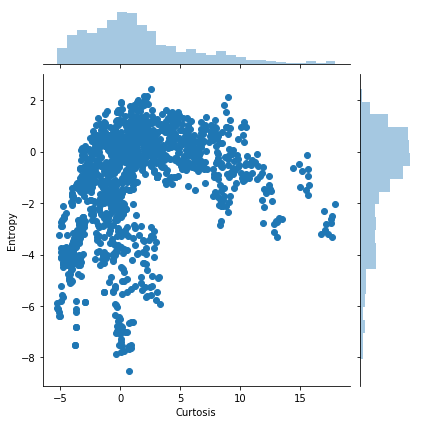

In [14]:
sns.jointplot(x='Curtosis',y='Entropy',data=dataset,kind='scatter')

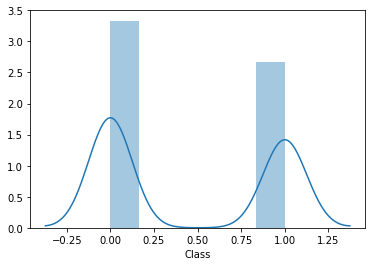

In [16]:
sns.distplot(dataset['Class'])

In [13]:
X = dataset.drop('Class',axis=1)
print(X)

      Variance  Skewness   Curtosis   Entropy
0     3.621600   8.66610  -2.807300 -0.446990
1     4.545900   8.16740  -2.458600 -1.462100
2     3.866000  -2.63830   1.924200  0.106450
3     3.456600   9.52280  -4.011200 -3.594400
4     0.329240  -4.45520   4.571800 -0.988800
5     4.368400   9.67180  -3.960600 -3.162500
6     3.591200   3.01290   0.728880  0.564210
7     2.092200  -6.81000   8.463600 -0.602160
8     3.203200   5.75880  -0.753450 -0.612510
9     1.535600   9.17720  -2.271800 -0.735350
10    1.224700   8.77790  -2.213500 -0.806470
11    3.989900  -2.70660   2.394600  0.862910
12    1.899300   7.66250   0.153940 -3.110800
13   -1.576800  10.84300   2.546200 -2.936200
14    3.404000   8.72610  -2.991500 -0.572420
15    4.676500  -3.38950   3.489600  1.477100
16    2.671900   3.06460   0.371580  0.586190
17    0.803550   2.84730   4.343900  0.601700
18    1.447900  -4.87940   8.342800 -2.108600
19    5.242300  11.02720  -4.353000 -4.101300
20    5.786700   7.89020  -2.61960

In [14]:
y = dataset['Class']

In [15]:
print(y)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  


In [18]:
from sklearn.svm import SVC  

svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = svclassifier.predict(X_test)  

In [20]:
print(y_pred)

[1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[154   1]
 [  1 119]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.99      0.99      0.99       120

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

